# section 1

In [41]:
import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib.pyplot
# !{sys.executable} -m pip install scipy
# !{sys.executable} -m pip install statsmodels
# !{sys.executable} -m pip install scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d
from scipy.integrate import quad
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
df21 = pd.read_csv(r'C:\Users\rafae\OneDrive\Documentos\prog\coding\modelagem-estatistica\MICRODADOS_ENEM_2021.csv',  sep=';',encoding='iso-8859-1', usecols=["NU_ANO","TP_FAIXA_ETARIA","TP_SEXO",
                                                                                                                          "TP_COR_RACA","TP_ST_CONCLUSAO", 'TP_ANO_CONCLUIU', "TP_ESCOLA",
                                                                                                                          "NO_MUNICIPIO_PROVA","SG_UF_PROVA",
                                                                                                                          "NU_NOTA_COMP3", "NU_NOTA_REDACAO",
                                                                                                                          "Q001","Q002","Q003","Q004","Q005","Q006","Q022","Q025"]).dropna()
df22 = pd.read_csv(r'C:\Users\rafae\OneDrive\Documentos\prog\coding\modelagem-estatistica\MICRODADOS_ENEM_2022.csv',  sep=';',encoding='iso-8859-1', usecols=["NU_ANO","TP_FAIXA_ETARIA","TP_SEXO",
                                                                                                                          "TP_COR_RACA","TP_ST_CONCLUSAO", 'TP_ANO_CONCLUIU', "TP_ESCOLA",
                                                                                                                          "NO_MUNICIPIO_PROVA","SG_UF_PROVA",
                                                                                                                          "NU_NOTA_COMP3", "NU_NOTA_REDACAO",
                                                                                                                          "Q001","Q002","Q003","Q004","Q005","Q006","Q022","Q025"]).dropna()
df23 = pd.read_csv(r'C:\Users\rafae\OneDrive\Documentos\prog\coding\modelagem-estatistica\MICRODADOS_ENEM_2023.csv',  sep=';',encoding='iso-8859-1', usecols=["NU_ANO","TP_FAIXA_ETARIA","TP_SEXO",
                                                                                                                          "TP_COR_RACA","TP_ST_CONCLUSAO", 'TP_ANO_CONCLUIU', "TP_ESCOLA",
                                                                                                                          "NO_MUNICIPIO_PROVA","SG_UF_PROVA",
                                                                                                                          "NU_NOTA_COMP3", "NU_NOTA_REDACAO",
                                                                                                                          "Q001","Q002","Q003","Q004","Q005","Q006","Q022","Q025"]).dropna()

In [43]:
# # computador fgv
# df22 = pd.read_csv(r'C:\Users\b47244\Documents\Modelagem-Estatistica\dados\MICRODADOS_ENEM_2022.csv',  sep=';',encoding='iso-8859-1', usecols=["NU_ANO","TP_FAIXA_ETARIA","TP_SEXO",
#                                                                                                                           "TP_COR_RACA","TP_ST_CONCLUSAO", 'TP_ANO_CONCLUIU', "TP_ESCOLA",
#                                                                                                                           "NO_MUNICIPIO_PROVA","SG_UF_PROVA",
#                                                                                                                           "NU_NOTA_COMP3", "NU_NOTA_REDACAO",
#                                                                                                                           "Q001","Q002","Q003","Q004","Q005","Q006","Q022","Q025"]).dropna()

In [44]:
df = pd.concat([df21, df22, df23])

Agora, iremos tratar esses dados:

In [45]:
df['tema relevante'] = df['NU_ANO'].apply(lambda x: 1 if x == 2022 else 0)
df.loc[:, 'NU_ANO'] = df['NU_ANO'] - 2021


In [46]:
# apenas quem nao zerou a competencia 3
df = df[df['NU_NOTA_COMP3']!=0]

# apenas quem nao zerou a competencia 3
df = df[df['NU_NOTA_REDACAO']!=0]

In [47]:
# Masculino = 1 e Feminino = 0
df['TP_SEXO'] = df['TP_SEXO'].replace('M',1).replace('F',0)

C:\Users\rafae\AppData\Local\Temp\ipykernel_8696\1320102506.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TP_SEXO'] = df['TP_SEXO'].replace('M',1).replace('F',0)


In [48]:
# apenas quem declarou a etnia e criar dummies
df = df[df['TP_COR_RACA']!=0]

print(len(df))
print(df['TP_COR_RACA'].value_counts())

df = pd.get_dummies(df, columns=['TP_COR_RACA'], prefix='TP_COR_RACA')

4762747
TP_COR_RACA
1    2054232
3    2038151
2     558325
4      87972
5      24067
Name: count, dtype: int64


In [49]:
# Ao invés de usar o nome dos municipios, iremos verificar se o aluno fez a prova em uma capital
capitais = [
    'Rio Branco', 'Maceió', 'Macapá', 'Manaus', 'Salvador', 'Fortaleza', 
    'Brasília', 'Vitória', 'Goiânia', 'São Luís', 'Cuiabá', 'Campo Grande', 
    'Belo Horizonte', 'Belém', 'João Pessoa', 'Curitiba', 'Recife', 
    'Teresina', 'Rio de Janeiro', 'Natal', 'Porto Alegre', 'Porto Velho', 
    'Boa Vista', 'Florianópolis', 'São Paulo', 'Aracaju', 'Palmas'
]

df['CAPITAL'] = df['NO_MUNICIPIO_PROVA'].apply(lambda x: 1 if x in capitais else 0)
df = df.drop('NO_MUNICIPIO_PROVA',axis=1)

In [50]:
# proporção de fora da capital é maior em índios
for i in range(1,6):   
    print(f"raça cor {i}: ", df[df[f"TP_COR_RACA_{i}"]== True]['CAPITAL'].sum()/len(df[df[f"TP_COR_RACA_{i}"]== True]))

raça cor 1:  0.295611206523898
raça cor 2:  0.3324372005552322
raça cor 3:  0.28561819021259954
raça cor 4:  0.3088596371572773
raça cor 5:  0.2243736236340217


In [51]:
# entendendo onde os indios estao
# esse conjunto de dados NAO é um pedaço que representa a população geral
# de indios. Note que PE é apenas o 4 estado com maior numero de indios no país.
print(df[df['TP_COR_RACA_5']== True]['SG_UF_PROVA'].value_counts())
print(df['TP_SEXO'].value_counts())

SG_UF_PROVA
PE    3652
AM    2820
BA    2313
SP    1699
CE    1528
PB    1434
PA    1291
MS    1111
MG     951
RJ     768
GO     738
MA     681
AL     646
PI     530
RR     473
SE     411
RN     404
ES     337
MT     329
PR     326
RO     286
RS     256
AC     229
SC     225
DF     220
TO     205
AP     204
Name: count, dtype: int64
TP_SEXO
0    3045042
1    1717705
Name: count, dtype: int64


In [52]:
# iremos usar dummies das regiões do país ao inves do nome dos estados para diminuir o numero de variaveis no modelo

regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def mapear_regiao(uf):
    for regiao, ufs in regioes.items():
        if uf in ufs:
            return regiao
    return None
df['Regiao'] = df['SG_UF_PROVA'].apply(mapear_regiao)

df = df.drop('SG_UF_PROVA',axis=1)
df = pd.get_dummies(df, columns=['Regiao'], prefix='Regiao')

In [53]:
# a distribuição geografico de indios tambem difere bastante dos não indios
print(df[df['TP_COR_RACA_5']== True].loc[:,['Regiao_Centro-Oeste', 'Regiao_Nordeste', 'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul']].sum())
print("\n----------------\n")
print(df[df['TP_COR_RACA_5']== False].loc[:,['Regiao_Centro-Oeste', 'Regiao_Nordeste', 'Regiao_Norte', 'Regiao_Sudeste', 'Regiao_Sul']].sum())

Regiao_Centro-Oeste     2398
Regiao_Nordeste        11599
Regiao_Norte            5508
Regiao_Sudeste          3755
Regiao_Sul               807
dtype: int64

----------------

Regiao_Centro-Oeste     403575
Regiao_Nordeste        1768445
Regiao_Norte            495408
Regiao_Sudeste         1571224
Regiao_Sul              500028
dtype: int64


In [54]:
# Q005 é sobre quantas pessoas moram na família e Q006 é sobre a renda mensal da familia (soma de cada um dos membros).
# Criaremos uma coluna que contabilize a renda per capita familiar

# Dicionário com as faixas salariais e seus valores numéricos
faixas_salarial = {
    'A': 0,
    'B': 1212,
    'C': 1818,
    'D': 2424,
    'E': 3030,
    'F': 3636,
    'G': 4848,
    'H': 6060,
    'I': 7272,
    'J': 8484,
    'K': 9696,
    'L': 10908,
    'M': 12120,
    'N': 14544,
    'O': 18180,
    'P': 24240,
    'Q': 24241  # Considerando acima de 24240
}

nova_faixa = {
    0: 0,
    1: 303,
    2: 606,
    3: 909,
    4: 1212,
    5: 1818,
    6: 2424,
    7: 3030,
    8: 3636,
    9: 4848,
    10: 6060,
    11: 9090,
    12: 9091, # valores acima de 9091 por pessoa
}

# Função para calcular a renda por pessoa e encontrar a faixa salarial correspondente
def calcular_faixa_renda_por_pessoa(pessoas, renda_familia):
    renda_total = faixas_salarial[renda_familia]
    renda_por_pessoa = renda_total / pessoas
    
    # Encontrar a faixa salarial correspondente
    for faixa, valor in nova_faixa.items():
        if renda_por_pessoa <= valor:
            return faixa
    return 12  # Para renda acima de R$ 9091,00 por pessoa

# Aplicar a função para calcular a faixa salarial da renda por pessoa
df['faixa_per_capita_fam'] = df.apply(lambda row: calcular_faixa_renda_por_pessoa(row['Q005'], row['Q006']), axis=1)


In [55]:
# Nota-se que a renda per capita por familia é menor em índios. Proporcionalmente, existem mais individuos com nenhuma renda.
# Isso também motiva a fazer o matching
print(df['Q005'].value_counts())
print(df['Q006'].value_counts())
print(df['faixa_per_capita_fam'].value_counts())
print('-------------')
print(df[df['TP_COR_RACA_5']== True]['Q005'].value_counts())
print(df[df['TP_COR_RACA_5']== True]['Q006'].value_counts())
print(df[df['TP_COR_RACA_5']== True]['faixa_per_capita_fam'].value_counts())

df = df.drop('Q005',axis=1)
df = df.drop('Q006',axis=1)

Q005
4.0     1641586
3.0     1335379
5.0      716161
2.0      593640
6.0      232375
1.0      103281
7.0       81777
8.0       33168
9.0       12349
10.0       6996
11.0       2372
12.0       1601
13.0        667
14.0        389
20.0        358
15.0        329
16.0        118
17.0         86
18.0         70
19.0         45
Name: count, dtype: int64
Q006
B    1383320
C     770926
D     556424
E     360753
G     295650
A     270138
F     242462
H     237575
I     119499
J      87951
Q      71521
M      67723
L      66852
K      65282
O      58224
P      54644
N      53803
Name: count, dtype: int64
faixa_per_capita_fam
2     1581639
1      822824
3      553697
4      499895
5      357133
0      270138
6      236053
7      118505
9       87676
8       83385
11      75286
10      65551
12      10965
Name: count, dtype: int64
-------------
Q005
4.0     6669
3.0     5223
5.0     4547
2.0     2561
6.0     2073
7.0     1077
1.0      724
8.0      544
9.0      258
10.0     198
11.0      66
12.0  

In [56]:
# print(df)
print(df.loc[:,['TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5']].sum())
print(df['Q001'].value_counts())
print(df['Q002'].value_counts())

# escolaridade da mae tende ser maior

TP_COR_RACA_1    2054232
TP_COR_RACA_2     558325
TP_COR_RACA_3    2038151
TP_COR_RACA_4      87972
TP_COR_RACA_5      24067
dtype: int64
Q001
E    1451441
B     749905
C     609893
D     539902
F     469466
H     421049
G     357121
A     163970
Name: count, dtype: int64
Q002
E    1749017
F     626984
G     606129
D     557387
B     511934
C     492065
H     121874
A      97357
Name: count, dtype: int64


In [57]:
# apenas quem sabe a escolaridade do pai OU da mãe
df = df.loc[(df['Q001'] != 'H') | (df['Q002'] != 'H')]

# apenas quem sabe a profissão do pai OU da mãe
df = df[~((df['Q003'] == 'F') & (df['Q004'] == 'F'))]

# Aplicar a função de conversão apenas para as colunas com letras
def letra_num(letra):
    return ord(letra) - ord('A')

for col in ['Q001', 'Q002', 'Q003', 'Q004', 'Q022', 'Q025']:
    df[col] = df[col].apply(letra_num)

# substituimos os valores de quem não sabe para não alterar o max
df[['Q001', 'Q002']] = df[['Q001', 'Q002']].replace(7,-1)
df[['Q003', 'Q004']] = df[['Q003', 'Q004']].replace(5,-1)

# escolhemos o responsável com maior escolaridade e o com "maior emprego"
df['responsavel_maior_escolaridade'] = df[['Q001', 'Q002']].max(axis=1)
df['responsavel_maior_emprego'] = df[['Q003', 'Q004']].max(axis=1)

df= df.drop(['Q001', 'Q002', 'Q003', 'Q004'],axis=1)


In [58]:
# print(df22)
print(df.loc[:,['TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5']].sum())
print(df['responsavel_maior_emprego'].value_counts())
print(df['responsavel_maior_escolaridade'].value_counts())

TP_COR_RACA_1    1983887
TP_COR_RACA_2     532355
TP_COR_RACA_3    1936253
TP_COR_RACA_4      83709
TP_COR_RACA_5      22579
dtype: int64
responsavel_maior_emprego
3    1469496
1    1121060
2     936601
0     548668
4     482958
Name: count, dtype: int64
responsavel_maior_escolaridade
4    1759500
6     765855
5     711184
3     484707
2     396894
1     385297
0      55346
Name: count, dtype: int64


In [59]:
df.loc[:, 'TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'] - 1
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].apply(lambda x: 1 if x < 2 else x) # menores de 18
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].apply(lambda x: 3 if x == 3 or x == 4 else x) # 19 - 20 anos
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].apply(lambda x: 4 if x == 5 or x == 6 or x == 7 else x) # 21 - 23 anos
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].apply(lambda x: 5 if x == 8 or x == 9 or x == 10 else x) # 24 - 30 anos
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].apply(lambda x: 6 if x > 10 else x) # 31+
print(df['TP_FAIXA_ETARIA'].value_counts())

TP_FAIXA_ETARIA
1    1538887
2    1196563
3     834499
4     424122
5     309673
6     255039
Name: count, dtype: int64


# section 2

Analisando os dados, percebi que apenas quem irá concluir o EM em 2022 que informou o tipo de escola que estudou (pública ou privada). Por isso, criei um segundo dataframe para analisar apenas esse grupo. No primeiro dataframe analiasaremos os dois grupos e poderemos ver como o ano de conclusão influencia no nota final.

In [60]:
df_2 = df[df['TP_ST_CONCLUSAO']==2].copy()

df_2.loc[:, 'TP_ESCOLA'] = df_2['TP_ESCOLA'] - 2

print(df_2['TP_ESCOLA'].value_counts())

df_2 = df_2.drop(df[(df['TP_ESCOLA'] == -1)].index)

TP_ESCOLA
 0    1526531
 1     373252
-1          2
Name: count, dtype: int64


In [61]:
# Pessoas que já se formaram nao identificaram o tipo de escola que estudaram (se publica ou privada).
# Logo criamos um df para podermos verificar se a quantidade de tempo desde que ela concluiu o EM influenciou no seu resultado

df = df[(df['TP_ST_CONCLUSAO'] == 1) | (df['TP_ST_CONCLUSAO'] == 2)]

# excluimos quem já concluiu o EM e não informou o ano que concluiu o EM
df = df.drop(df[(df['TP_ST_CONCLUSAO'] == 1) & (df['TP_ANO_CONCLUIU'] == 0)].index)

In [62]:
# removemos a coluna do status de conclusao no DFs 1 e 2
df = df.drop('TP_ST_CONCLUSAO',axis=1)
df_2 = df_2.drop('TP_ST_CONCLUSAO',axis=1)

In [63]:
# removemos a coluna de ano de conclusão do DF 2
df_2 = df_2.drop('TP_ANO_CONCLUIU',axis=1)

In [64]:
# removemos a coluna do tipo de escola do DF 1
df = df.drop('TP_ESCOLA',axis=1)


In [65]:
# Reiniciar os índices
df.reset_index(drop=True, inplace=True)
df_2.reset_index(drop=True, inplace=True)

# trocar booleanos
df = df*1
df_2 = df_2*1

Agora, vamos fazer o matching. É esperado que reduza vieses, uma vez que igualamos as situações socieconômicas. As correlações entre variáveis socioeconômicas e notas de redação devem ser mais próximas entre indígenas e não indígenas após o matching, refletindo a equiparação das condições de base (de fato foi o observado).

Os indigenas parecem ser diferentes da população geral: menor acesso a internet, menor presença em capitais, esoclaridade (?). Além disso, tem uma diferença de dados muito grande entre indigenas e nao indigenas. Portanto, as analises devem se mostrar mais claras após o matching

In [66]:
# USANDO ESCOLA USANDO ESCOLA USANDO ESCOLA USANDO ESCOLA USANDO ESCOLA
# USANDO ESCOLA USANDO ESCOLA USANDO ESCOLA USANDO ESCOLA USANDO ESCOLA
df = df_2.copy()
print(df.columns)

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESCOLA', 'NU_NOTA_COMP3',
       'NU_NOTA_REDACAO', 'Q022', 'Q025', 'tema relevante', 'TP_COR_RACA_1',
       'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5',
       'CAPITAL', 'Regiao_Centro-Oeste', 'Regiao_Nordeste', 'Regiao_Norte',
       'Regiao_Sudeste', 'Regiao_Sul', 'faixa_per_capita_fam',
       'responsavel_maior_escolaridade', 'responsavel_maior_emprego'],
      dtype='object')


In [67]:
# Carregar os dados (suponha que df já esteja carregado)
# Filtrar os dados para incluir apenas os indígenas e os não indígenas
dados_indigenas = df[df['TP_COR_RACA_5'] == True].copy()
dados_nao_indigenas = df[df['TP_COR_RACA_5'] == False].copy()

# Selecionar as colunas relevantes para o matching
colunas_relevantes = [
    'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
    'Q022', 'Q025', 'faixa_per_capita_fam',
    'responsavel_maior_escolaridade', 'responsavel_maior_emprego', 
    'CAPITAL',
]

# Adicionar uma coluna de ID para identificar cada indígena e não indígena único
dados_indigenas['indigena_id'] = dados_indigenas.index
dados_nao_indigenas['nao_indigena_id'] = dados_nao_indigenas.index

# Realizar um merge completo para encontrar todos os possíveis matches
merged = pd.merge(dados_indigenas, dados_nao_indigenas, on=colunas_relevantes, how='left', suffixes=('_indigena', '_nao_indigena')).dropna()

# Inicializar conjuntos para manter rastreamento de matches únicos
matches = []
nao_indigenas_usados = set()

# Iterar sobre cada indígena
for indio_id in dados_indigenas['indigena_id']:
    possiveis_matches = merged[merged['indigena_id'] == indio_id]
    
    for _, row in possiveis_matches.iterrows():
        nao_indigena_id = row['nao_indigena_id']
        if nao_indigena_id not in nao_indigenas_usados:
            matches.append(indio_id)
            matches.append(nao_indigena_id)
            nao_indigenas_usados.add(nao_indigena_id)
            break

# Exibir o número de matches encontrados
print(f"Número de indígenas: {len(dados_indigenas)}")
print(f"Número de matches encontrados: {len(matches)/2}")
indigenas_sem_matches = dados_indigenas[~dados_indigenas['indigena_id'].isin(matches)] # em geral sao indigenas isolados, ou seja,
# sem acesso a internet, com poucos ou nenhum telefones celulares em casa

Número de indígenas: 9324
Número de matches encontrados: 9136.0


In [68]:
print(indigenas_sem_matches['faixa_per_capita_fam'].value_counts())

faixa_per_capita_fam
0     52
1     50
2     32
4     20
3     17
6      6
5      4
7      3
8      2
10     1
9      1
Name: count, dtype: int64


In [69]:
# atualizando o df
df_sem_match = df.copy()
df = df[df.index.isin(matches)]

analisando a matriz de correlação notamos que as variaveis mais importantes para a nota da redação (ou da competencia 3) são Q022, Q025, faixa per capita da familia, responsavel com maior escolaridade e responsavel com maior emprego. A média e o desvio padrao desses valores tendem a ter resultados similares ao longo dos anos analisados.

Um ponto importante a destacar é que a variavel sobre acesso a internet (Q025) teve uma leve mudança na sua distribuição ao longo dos anos, algo que não foi observado nas outras variaveis

In [70]:
df.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESCOLA,NU_NOTA_COMP3,NU_NOTA_REDACAO,Q022,Q025,tema relevante,TP_COR_RACA_1,...,TP_COR_RACA_5,CAPITAL,Regiao_Centro-Oeste,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul,faixa_per_capita_fam,responsavel_maior_escolaridade,responsavel_maior_emprego
count,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,...,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000,18272.000000
mean,1.145468,1.839426,0.383975,0.051171,115.726795,614.673818,2.298052,0.806808,0.468805,0.167579,...,0.500000,0.201948,0.098894,0.463660,0.169002,0.212620,0.055823,1.824321,3.492885,1.565346
std,0.714186,0.822847,0.486365,0.220353,31.750033,160.137190,1.157008,0.394813,0.499040,0.373502,...,0.500014,0.401465,0.298528,0.498691,0.374764,0.409172,0.229586,1.497742,1.500170,1.205636
min,0.000000,1.000000,0.000000,0.000000,20.000000,60.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,100.000000,500.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,1.000000,2.000000,0.000000,0.000000,120.000000,600.000000,2.000000,1.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000
75%,2.000000,2.000000,1.000000,0.000000,120.000000,720.000000,3.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000
max,2.000000,6.000000,1.000000,1.000000,200.000000,980.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,4.000000


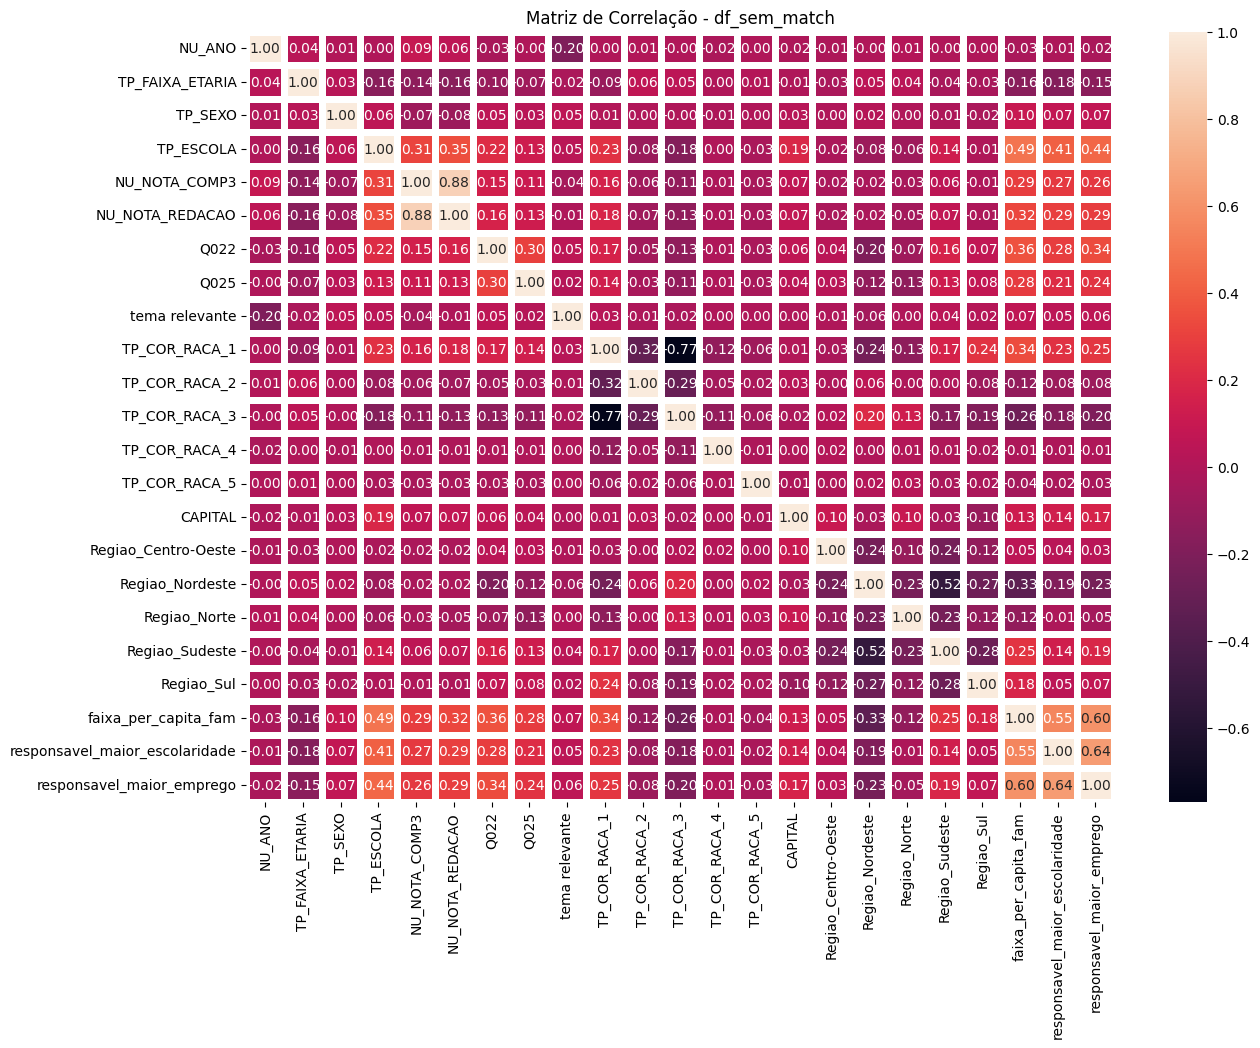

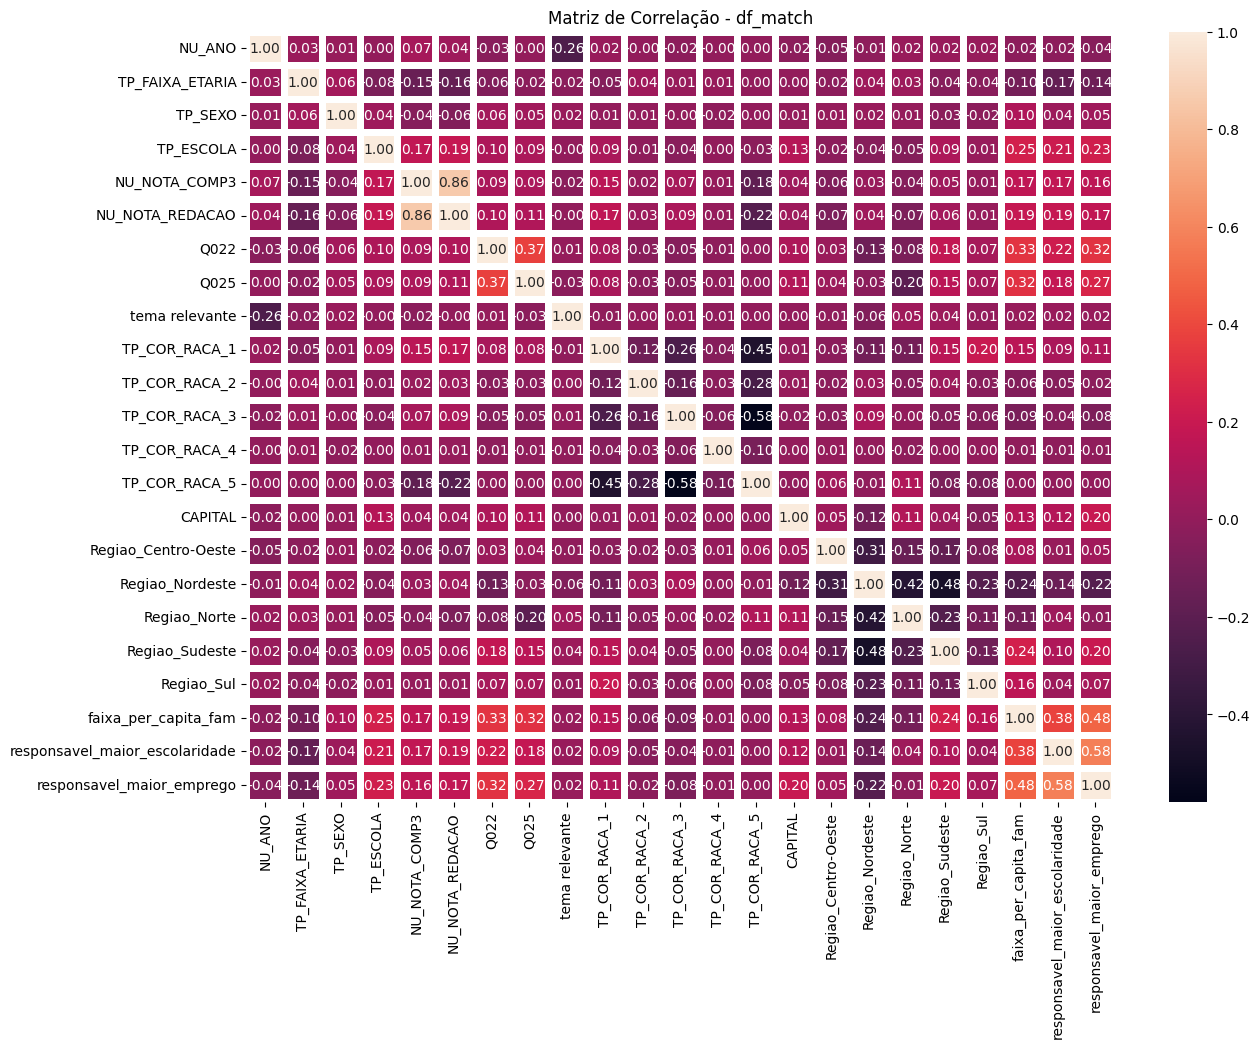

In [71]:
# nota-se que a correlação da cor/raça indigena com a nota da redação foi menos negativa em 22 e o valor da variavel indio se torna mais significativa

plt.figure(figsize=(14, 10))
# Plot da matriz de correlação para df
plot1 = sns.heatmap(df_sem_match.corr(method='spearman'), annot=True, fmt="0.2f", linewidths=5)
plt.title('Matriz de Correlação - df_sem_match')
# Exibir o plot1
plt.show()


plt.figure(figsize=(14, 10))
# Plot da matriz de correlação para df_match
plot2 = sns.heatmap(df.corr(method='spearman'), annot=True, fmt="0.2f", linewidths=5)
plt.title('Matriz de Correlação - df_match')
# Exibir o plot2
plt.show()

# Modelos

Modelos:
* regressão linear x multinivel
* nota da redação x nota da competencia 3
* todas as variaveis
* variaveis relevantes
* exlcuindo as com correlação muito alta
* indio ou nao-indio apenas


In [72]:
print(df.columns)

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESCOLA', 'NU_NOTA_COMP3',
       'NU_NOTA_REDACAO', 'Q022', 'Q025', 'tema relevante', 'TP_COR_RACA_1',
       'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5',
       'CAPITAL', 'Regiao_Centro-Oeste', 'Regiao_Nordeste', 'Regiao_Norte',
       'Regiao_Sudeste', 'Regiao_Sul', 'faixa_per_capita_fam',
       'responsavel_maior_escolaridade', 'responsavel_maior_emprego'],
      dtype='object')


In [73]:
def combine_race(row):
    if row['TP_COR_RACA_1'] == 1:
        return '1'
    elif row['TP_COR_RACA_2'] == 1:
        return '2'
    elif row['TP_COR_RACA_3'] == 1:
        return '3'
    elif row['TP_COR_RACA_4'] == 1:
        return '4'
    elif row['TP_COR_RACA_5'] == 1:
        return '5'
    else:
        return 'Unknown'
    
def combine_regiao(row):
    if row['Regiao_Centro-Oeste'] == 1:
        return '1'
    elif row['Regiao_Nordeste'] == 1:
        return '2'
    elif row['Regiao_Norte'] == 1:
        return '3'
    elif row['Regiao_Sudeste'] == 1:
        return '4'
    elif row['Regiao_Sul'] == 1:
        return '5'
    else:
        return 'Unknown'

In [82]:
import statsmodels.formula.api as smf
import numpy as np

# Definição da fórmula
formula = 'NU_NOTA_REDACAO ~ NU_ANO + tema relevante + tema relevante * TP_COR_RACA_5 + TP_FAIXA_ETARIA + TP_SEXO + TP_ESCOLA + Q022 + Q025 + TP_COR_RACA_5 + C(Regiao) \
    + CAPITAL + faixa_per_capita_fam + responsavel_maior_escolaridade + responsavel_maior_emprego'

# Criação de uma cópia do DataFrame
df_multinivel = df.copy()

df_multinivel['Regiao'] = df_multinivel.apply(combine_regiao, axis=1)

# Ajustar o modelo multinível
model_multinivel = smf.mixedlm(formula, data=df_multinivel, groups=df_multinivel['TP_COR_RACA_5']).fit()

# Exibir os resultados
print(model_multinivel.summary())

# Predição dos valores ajustados
y_pred = model_multinivel.fittedvalues

# Valores reais
y_real = df_multinivel['NU_NOTA_REDACAO']

# Cálculo do R²
ss_total = np.sum((y_real - np.mean(y_real)) ** 2)
ss_residual = np.sum((y_real - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Cálculo do erro absoluto
mae = np.mean(np.abs(y_real - y_pred))

print(f'R²: {r_squared}')
print(f'Mean Absolute Error: {mae}')


SyntaxError: invalid syntax (<unknown>, line 1)

In [84]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df_sem_match[['NU_ANO', 'tema relevante','TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESCOLA',
        'Q022', 'Q025', 'TP_COR_RACA_1',
       'TP_COR_RACA_2', 'TP_COR_RACA_3', 'TP_COR_RACA_4', 'TP_COR_RACA_5',
       'CAPITAL', 'Regiao_Centro-Oeste', 'Regiao_Nordeste', 'Regiao_Norte',
       'Regiao_Sudeste', 'Regiao_Sul', 'faixa_per_capita_fam',
       'responsavel_maior_escolaridade', 'responsavel_maior_emprego']].copy()

Y = df_sem_match['NU_NOTA_REDACAO'].copy()

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

reg = LinearRegression()
# Treinando o modelo
model1 =  reg.fit(X_train, y_train)
# Prevendo os dados de saída com o modelo treinado 
y_pred = model1.predict(X_test)
# Aqui plotamos os coeficientes da nossa regressão
reg.coef_

array([ 1.26878967e+01, -6.39791653e+00, -2.20609026e+01, -4.02521599e+01,
        7.53940369e+01,  5.93267085e+00,  1.94481373e+01, -7.43497114e+12,
       -7.43497114e+12, -7.43497114e+12, -7.43497114e+12, -7.43497114e+12,
       -4.02745856e+00,  1.56264388e+12,  1.56264388e+12,  1.56264388e+12,
        1.56264388e+12,  1.56264388e+12,  9.54913488e+00,  1.00819409e+01,
        7.10087963e+00])

In [85]:
print( mean_squared_error(y_test, y_pred) )
print( mean_absolute_error(y_test, y_pred) )

21231.434814326218
117.37971686290324


In [77]:
df_saida = pd.DataFrame()
df_saida['y'] = y_test
df_saida['y_pred'] = y_pred

# Visualizando os dados previstos vs dados reais.
df_saida.head(100)

,y,y_pred
1587770,500.0,667.251862
1755360,760.0,659.425049
1238838,460.0,592.335571
664193,740.0,647.995178
764353,720.0,706.970703
...,...,...
932705,940.0,801.223785
1490115,520.0,625.125732
1522167,720.0,610.580872
154397,620.0,671.203400


In [78]:
# Importando Statsmodels para ter uma visão visão mais geral dos indicadores do modelo.
import statsmodels.api as sm

# Aqui estamos usando os mesmos dados anteriore de treino e teste. 
# O modelo resultante é exatamente o mesmo.
X_train=sm.add_constant(X_train)
m1 = sm.OLS( y_train, X_train)
m1 = m1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NU_NOTA_REDACAO   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                 1.956e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:23:51   Log-Likelihood:            -9.7313e+06
No. Observations:             1519828   AIC:                         1.946e+07
Df Residuals:                 1519808   BIC:                         1.946e+07
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           6.298e+11   1.02e+12      0.616      0.538   -1.37e+12    2.63e+12
TP_FAIXA_ETARIA                  -21.7513      0.166   -131.141      0.000     -22.076     -21.426
TP_SEXO                          -40.3701      0.247   -163.407      0.000     -40.854     -39.886
TP_ESCOLA                         75.9160      0.372    203.839      0.000      75.186      76.646
Q022                               5.5988      0.125     44.961      0.000       5.355       5.843
Q025                              19.9255      0.480     41.489      0.000      18.984      20.867
TP_COR_RACA_1                   2.263e+10   9.57e+11      0.024      0.981   -1.85e+12     1.9e+12
TP_COR_RACA_2                   2.263e+10   9.57e+11      0.024      0.981   -1.85e+12     1.9e+12
TP_COR_RACA_3                   2.263e+10   9.57e+11      0.024      0.981   -1.85e+12     1.9e+12
TP_COR_RACA_4                   2.263e+10   9.57e+11      0.024      0.981   -1.85e+12     1.9e+12
TP_COR_RACA_5                   2.263e+10   9.57e+11      0.024      0.981   -1.85e+12     1.9e+12
CAPITAL                           -4.2215      0.280    -15.093      0.000      -4.770      -3.673
Regiao_Centro-Oeste            -6.524e+11   3.61e+11     -1.808      0.071   -1.36e+12    5.49e+10
Regiao_Nordeste                -6.524e+11   3.61e+11     -1.808      0.071   -1.36e+12    5.49e+10
Regiao_Norte                   -6.524e+11   3.61e+11     -1.808      0.071   -1.36e+12    5.49e+10
Regiao_Sudeste                 -6.524e+11   3.61e+11     -1.808      0.071   -1.36e+12    5.49e+10
Regiao_Sul                     -6.524e+11   3.61e+11     -1.808      0.071   -1.36e+12    5.49e+10
faixa_per_capita_fam               9.4186      0.072    130.997      0.000       9.278       9.560
responsavel_maior_escolaridade    10.2014      0.113     90.211      0.000       9.980      10.423
responsavel_maior_emprego          6.9151      0.142     48.823      0.000       6.637       7.193
==============================================================================
Omnibus:                     9335.796   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6753.561
Skew:                          -0.048   Prob(JB):                         0.00
Kurtosis:                       2.688   Cond. No.                     1.37e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.87e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
from sklearn.preprocessing import StandardScaler

X_orig=X.values
Y_orig=Y.values

# Vamos padronizar os dados 
Xscaler=StandardScaler()
Yscaler=StandardScaler()
 
# Armazenar parâmetros
XscalerFit=Xscaler.fit(X_orig)
YscalerFit=Yscaler.fit(Y_orig.reshape(-1, 1))
 
# Gerar valores padronizados de X e y
X_pad=XscalerFit.transform(X_orig)
Y_pad=YscalerFit.transform(Y_orig.reshape(-1, 1))

In [80]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split( X_pad, Y_pad, test_size=0.20, random_state=42)

X_trainols=sm.add_constant(X_train)
m1 = sm.OLS( y_train, X_trainols)
m1 = m1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                 1.956e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:23:59   Log-Likelihood:            -1.9904e+06
No. Observations:             1519828   AIC:                         3.981e+06
Df Residuals:                 1519808   BIC:                         3.981e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.354e-05      0.001     -0.032      0.974      -0.001       0.001
x1            -0.0985      0.001   -131.149      0.000      -0.100      -0.097
x2            -0.1198      0.001   -163.373      0.000      -0.121      -0.118
x3             0.1853      0.001    202.049      0.000       0.183       0.187
x4             0.0367      0.001     44.834      0.000       0.035       0.038
x5             0.0327      0.001     41.431      0.000       0.031       0.034
x6          1.114e+09   1.93e+09      0.577      0.564   -2.67e+09    4.89e+09
x7          6.946e+08    1.2e+09      0.577      0.564   -1.66e+09    3.05e+09
x8          1.103e+09   1.91e+09      0.577      0.564   -2.64e+09    4.85e+09
x9          2.947e+08    5.1e+08      0.577      0.564   -7.06e+08     1.3e+09
x10         1.563e+08   2.71e+08      0.577      0.564   -3.74e+08    6.87e+08
x11           -0.0116      0.001    -15.162      0.000      -0.013      -0.010
x12          -2.8e+09   1.33e+09     -2.113      0.035    -5.4e+09   -2.02e+08
x13        -4.457e+09   2.11e+09     -2.113      0.035   -8.59e+09   -3.22e+08
x14        -2.714e+09   1.28e+09     -2.113      0.035   -5.23e+09   -1.96e+08
x15        -4.488e+09   2.12e+09     -2.113      0.035   -8.65e+09   -3.24e+08
x16        -3.116e+09   1.48e+09     -2.113      0.035   -6.01e+09   -2.25e+08
x17            0.1382      0.001    130.995      0.000       0.136       0.140
x18            0.0878      0.001     90.212      0.000       0.086       0.090
x19            0.0505      0.001     48.823      0.000       0.048       0.053
==============================================================================
Omnibus:                     9347.215   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6759.080
Skew:                          -0.048   Prob(JB):                         0.00
Kurtosis:                       2.688   Cond. No.                     1.00e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.52e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""